In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
# Load dataset (replace 'file_path' with your Kaggle file path if needed)
data = pd.read_csv('/kaggle/input/nasa-data/hwc.csv')

# Retain only the specified columns
selected_columns = [
    'P_NAME', 'P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_ECCENTRICITY', 
    'S_RA', 'S_DEC', 'S_TEMPERATURE', 'S_MASS', 'S_RADIUS', 
    'S_METALLICITY', 'P_TEMP_SURF', 'P_HABITABLE'
]
data_selected = data[selected_columns]

In [3]:
data_selected

,P_NAME,P_MASS,P_RADIUS,P_PERIOD,P_ECCENTRICITY,S_RA,S_DEC,S_TEMPERATURE,S_MASS,S_RADIUS,S_METALLICITY,P_TEMP_SURF,P_HABITABLE
0,OGLE-2016-BLG-1227L b,250.00000,13.90,NaN,NaN,265.597130,-33.759778,NaN,0.10,NaN,NaN,NaN,0
1,Kepler-276 c,16.60000,2.90,31.884000,0.000,293.568200,39.036312,5779.0,1.10,1.03,0.02,NaN,0
2,Kepler-829 b,5.10000,2.11,6.883376,0.000,282.332830,42.463813,5698.0,0.98,0.97,0.03,1130.60440,0
3,K2-283 b,12.20000,3.52,1.921036,NaN,13.194368,9.692918,5060.0,0.89,0.82,0.28,NaN,0
4,Kepler-477 b,4.94000,2.07,11.119907,0.000,288.067450,42.355305,5240.0,0.87,0.79,-0.04,769.42507,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,HD 222155 b,581.62598,13.40,3999.000000,0.160,354.502560,48.996019,5701.0,1.21,1.85,-0.18,NaN,0
5595,HD 88986 b,17.20000,2.49,146.050000,0.240,154.116690,28.682071,5861.0,1.25,1.54,0.06,NaN,0
5596,Kepler-30 b,11.30000,3.90,29.334340,0.042,285.283650,38.947263,5498.0,0.99,0.95,0.18,NaN,0
5597,HD 3167 d,4.33000,1.92,8.411200,0.120,8.740149,4.380721,5261.0,0.84,0.88,0.04,890.78087,0


In [4]:
from sklearn.impute import KNNImputer
# Separate features and target variable
X = data_selected.drop(columns=['P_NAME', 'P_HABITABLE'])  # Drop P_NAME and target column from features
y = data_selected['P_HABITABLE']

# Initialize KNNImputer (default k=5, but you can adjust)
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputer to the dataset (fit and transform)
X_imputed = knn_imputer.fit_transform(X)

# Convert imputed data back to DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Standardize the imputed dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)

# Convert scaled data back to DataFrame for easy handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the preprocessed data
X_scaled_df.head()

,P_MASS,P_RADIUS,P_PERIOD,P_ECCENTRICITY,S_RA,S_DEC,S_TEMPERATURE,S_MASS,S_RADIUS,S_METALLICITY,P_TEMP_SURF
0,-0.081550,1.534512,-0.019316,0.435974,0.319095,-1.488452,0.361731,-2.009092,0.066950,-0.318712,0.037228
1,-0.180112,-0.529066,-0.019418,-0.580771,0.629017,0.542665,0.175700,0.354330,-0.125975,0.042036,-0.463331
2,-0.184969,-0.677268,-0.019422,-0.580771,0.504528,0.638297,0.131718,0.070719,-0.140517,0.089503,0.490009
3,-0.181970,-0.412755,-0.019423,0.297948,-2.477544,-0.276059,-0.214714,-0.141989,-0.176872,1.276176,-0.457468
4,-0.185036,-0.684772,-0.019421,-0.580771,0.568068,0.635270,-0.116975,-0.189257,-0.184143,-0.242765,-0.325262


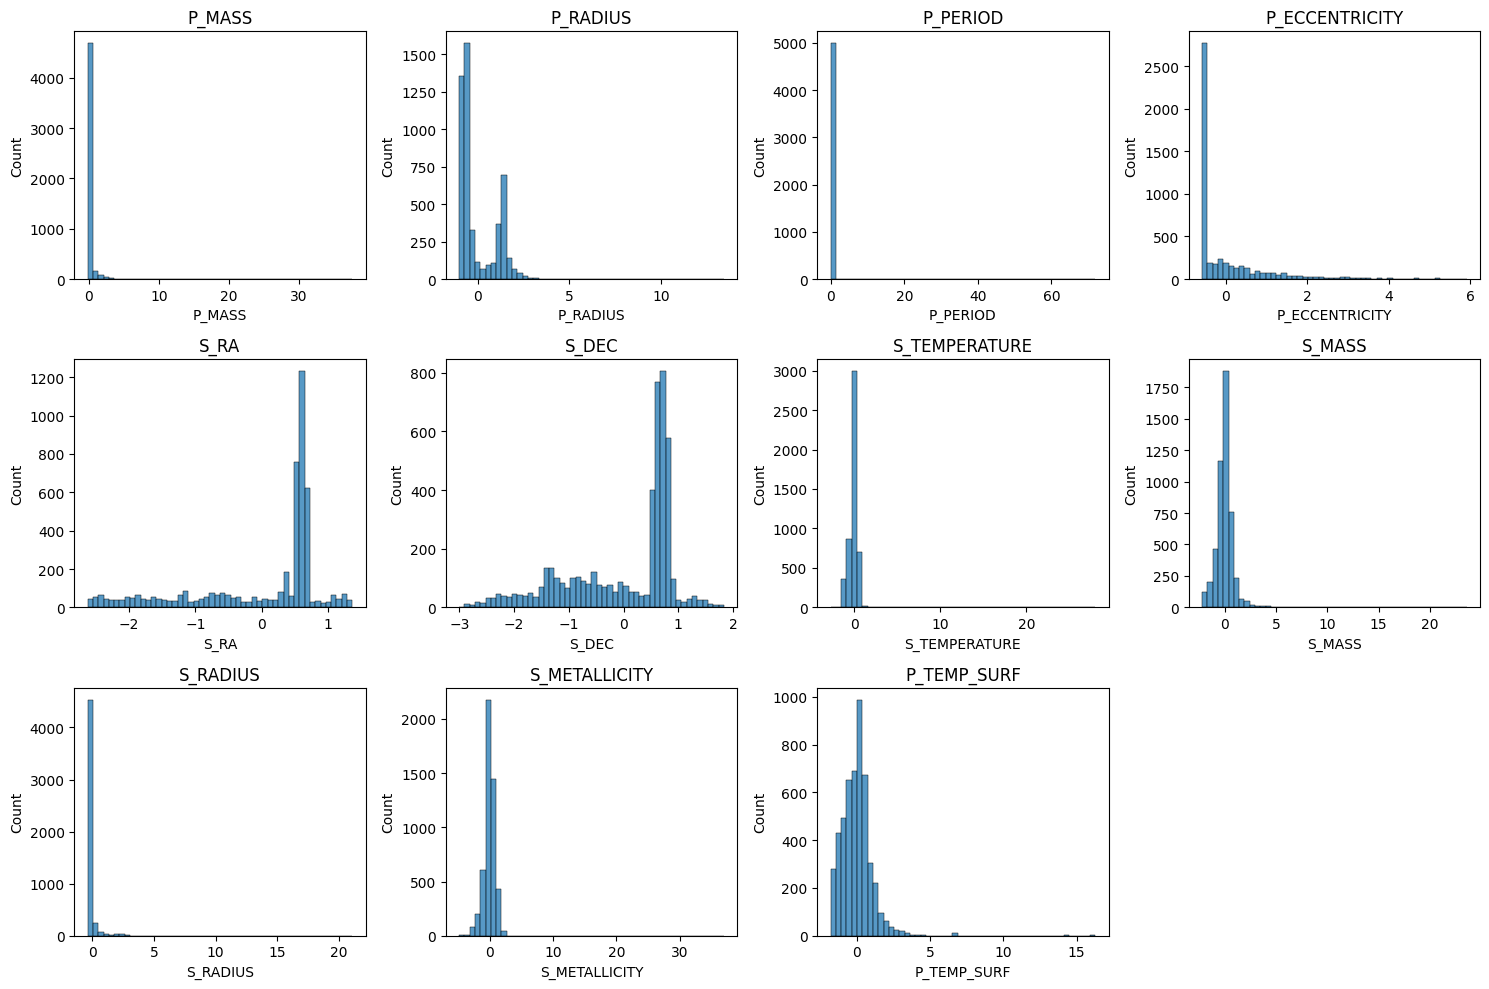

In [5]:
# To get a sense of the distribution and potential skewness of individual features.
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings globally
warnings.simplefilter(action="ignore", category=FutureWarning)

# Sample data if necessary
X_sampled_df = X_scaled_df.sample(n=5000, random_state=42) if len(X_scaled_df) > 5000 else X_scaled_df

# Plot histograms for each scaled feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_sampled_df.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(X_sampled_df[column], kde=False, bins=50)  # Turn off KDE & set bins
    plt.title(column)
    plt.xscale('log') if X_sampled_df[column].max() > 100 else None  # Apply log scale if needed
plt.tight_layout()
plt.show()



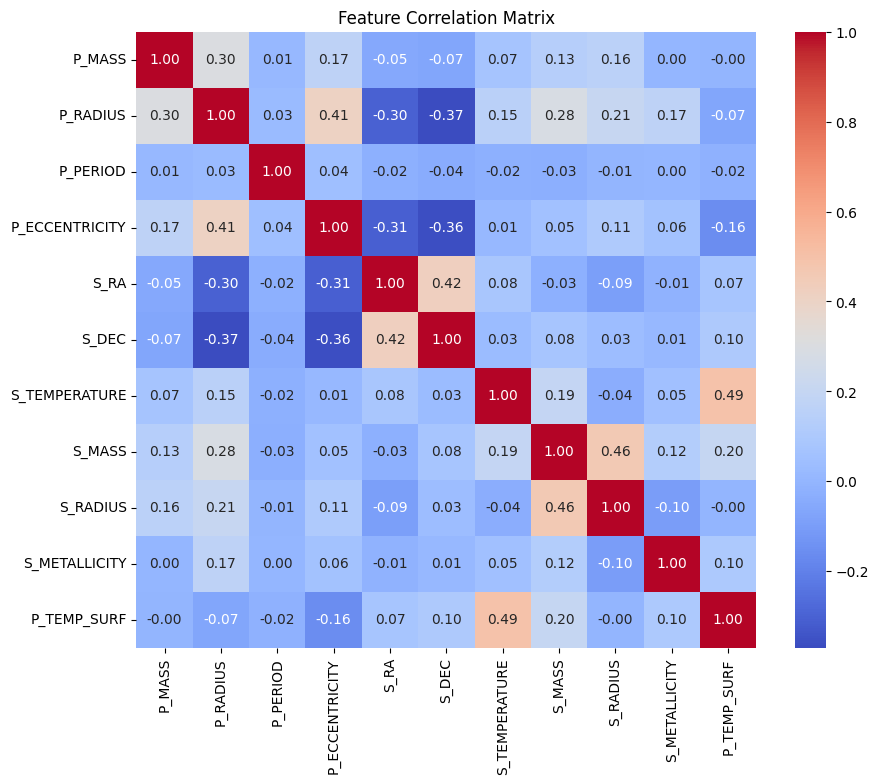

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_scaled_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


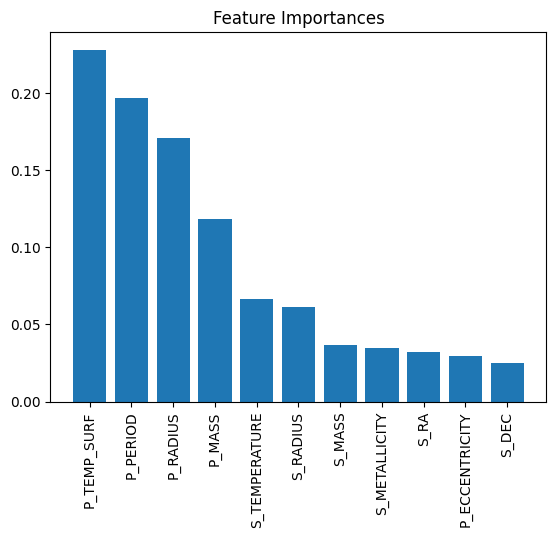

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Assuming your target variable 'y' is binary and 'X_scaled_df' is your feature DataFrame
model = RandomForestClassifier()
model.fit(X_scaled_df, y)

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_scaled_df.shape[1]), importances[indices], align='center')
plt.xticks(range(X_scaled_df.shape[1]), X_scaled_df.columns[indices], rotation=90)
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Display results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

Model: Logistic Regression
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1677
           1       0.97      1.00      0.98      1684
           2       0.97      0.98      0.97      1616

    accuracy                           0.98      4977
   macro avg       0.98      0.98      0.98      4977
weighted avg       0.98      0.98      0.98      4977


Model: Random Forest
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1677
           1       1.00      1.00      1.00      1684
           2       1.00      1.00      1.00      1616

    accuracy                           1.00      4977
   macro avg       1.00      1.00      1.00      4977
weighted avg       1.00      1.00      1.00      4977


Model: Gradient Boosting
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   sup

In [14]:
# Import necessary libraries for cross-validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, f1_score

# Define Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro')  # Macro F1 to evaluate across all classes
}

# Perform cross-validation and print results
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    
    # Cross-validate with accuracy
    accuracy_scores = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring=scoring['accuracy'])
    print(f"Cross-Validation Accuracy: {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")
    
    # Cross-validate with F1 macro
    f1_scores = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring=scoring['f1_macro'])
    print(f"Cross-Validation Macro F1 Score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")



Model: Random Forest
Cross-Validation Accuracy: 0.9993 ± 0.0005
Cross-Validation Macro F1 Score: 0.9993 ± 0.0005

Model: Gradient Boosting
Cross-Validation Accuracy: 0.9991 ± 0.0005
Cross-Validation Macro F1 Score: 0.9991 ± 0.0005


In [15]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Define Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro')  # Macro F1 to evaluate across all classes
}

# Dictionary to hold scores for each model
results = {'Model': [], 'Fold': [], 'Accuracy': [], 'F1_Score': []}

# Perform cross-validation
for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring=scoring['accuracy'])
    f1_scores = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring=scoring['f1_macro'])
    
    # Store scores in results dictionary
    for fold, (acc, f1) in enumerate(zip(accuracy_scores, f1_scores), start=1):
        results['Model'].append(model_name)
        results['Fold'].append(fold)
        results['Accuracy'].append(acc)
        results['F1_Score'].append(f1)

# Convert results to DataFrame for plotting
results_df = pd.DataFrame(results)


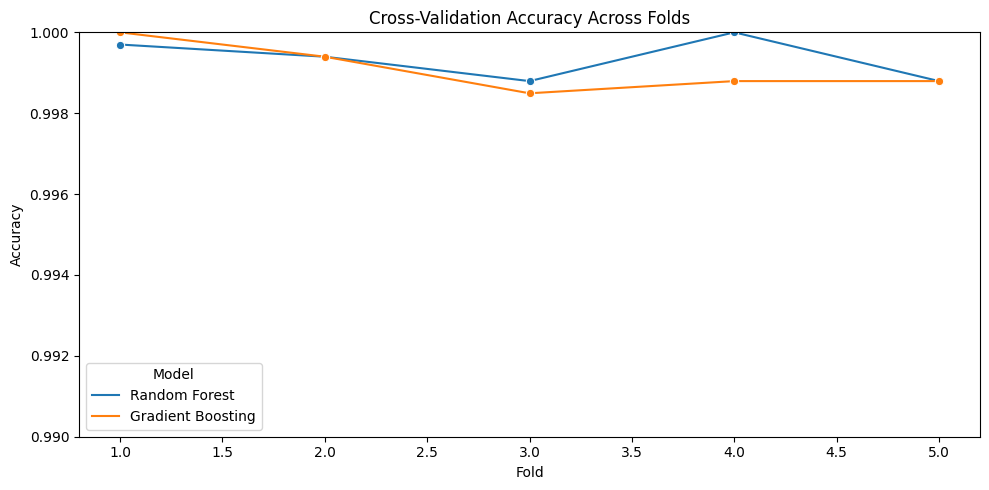

In [9]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress specific warnings related to deprecated functionality
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Plot F1 Score and Accuracy for each fold
plt.figure(figsize=(10, 5))

# Line plot for Accuracy
sns.lineplot(data=results_df, x='Fold', y='Accuracy', hue='Model', marker='o')
plt.title('Cross-Validation Accuracy Across Folds')
plt.ylim(0.99, 1.0)  # Adjust based on scores
plt.ylabel('Accuracy')
plt.xlabel('Fold')

plt.legend(title='Model')
plt.tight_layout()
plt.show()


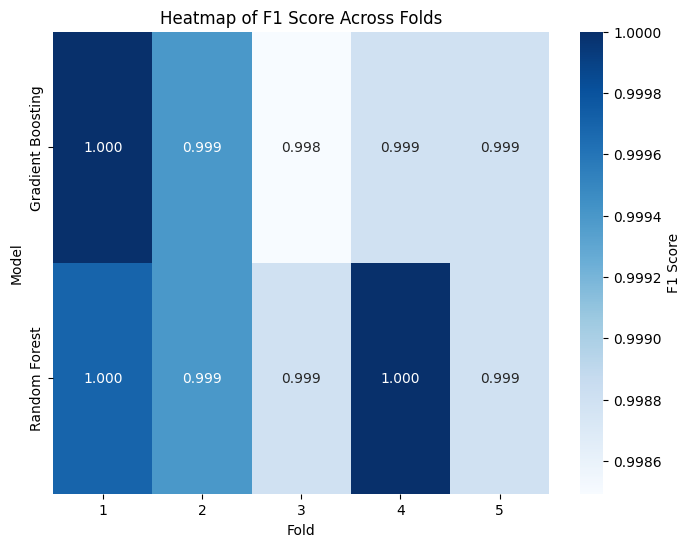

In [12]:
# Heatmap of average scores
# Pivot table to create a grid for the heatmap
heatmap_data = results_df.groupby(['Model', 'Fold']).mean().reset_index()
heatmap_data_pivot = heatmap_data.pivot(index='Model', columns='Fold', values='F1_Score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_pivot, annot=True, cmap='Blues', fmt=".3f", cbar_kws={'label': 'F1 Score'})
plt.title('Heatmap of F1 Score Across Folds')
plt.show()